# Тест детектора YOLO на COCO датасете

Задача детекции с YOLO на COCO датасете


##  Download YOLO


In [ ]:
!pip install -q ultralytics pycocotools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.0 MB/s eta 0:00:00


Create model instance. [models](https://github.com/Deci-AI/super-gradients/blob/master/YOLONAS.md)

In [ ]:
from ultralytics import YOLO


yolo = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 132MB/s]


## Smoke test

Test model on arbitrary image

In [ ]:
from PIL import Image

!wget -qO test_image.png https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX11/semantic_segmentation.png
img = Image.open("test_image.png")

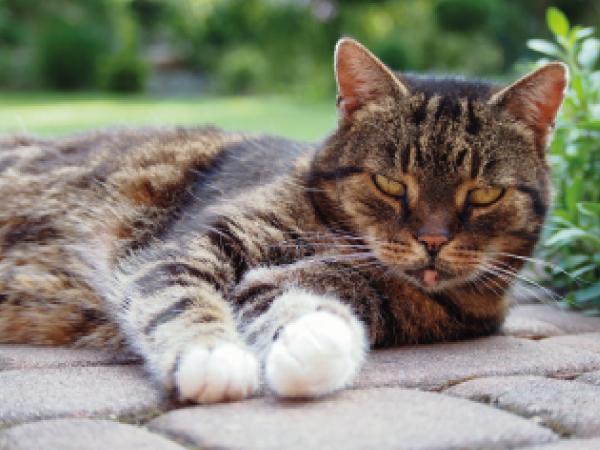

In [ ]:
display(img)

In [ ]:
result = yolo.predict(img)


0: 480x640 1 cat, 201.1ms
Speed: 7.8ms preprocess, 201.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


## Load the data

Load first five images with bicycles from COCO dataset

*  Use [pycocotools](https://github.com/cocodataset/cocoapi.git)
*  Display loaded images

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip -o annotations_trainval2017.zip annotations/instances_val2017.json

--2025-02-17 20:52:10--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.58.121, 3.5.28.26, 3.5.7.144, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.58.121|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip.3’

annotations_trainva 100%[===================>] 241.19M  6.22MB/s    in 7.1s    

2025-02-17 20:52:17 (34.0 MB/s) - ‘annotations_trainval2017.zip.3’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_val2017.json  


In [ ]:
from pycocotools.coco import COCO
import requests

coco = COCO("annotations/instances_val2017.json")

bicycle_category_id = 2
bicycle_img_ids = coco.getImgIds(catIds=[bicycle_category_id])[:5]
bicycle_imgs = coco.loadImgs(bicycle_img_ids)

for img_info in bicycle_imgs:
    img_url = img_info['coco_url']
    img_data = requests.get(img_url).content
    with open(img_info['file_name'], "wb") as f:
        f.write(img_data)

loading annotations into memory...
Done (t=1.68s)
creating index...
index created!


## Detection

Detect bicycles in downloaded images using YOLO.

Display ground true and detected bounding boxes on images. Use red for YOLO bounding boxes and green for ground true.

https://pytorch.org/vision/stable/utils.html

The resulting images should look as follows:

 <img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX11/result_4_task_ex11.png" width="400">



0: 448x640 14 persons, 2 bicycles, 5 cars, 1 truck, 1 handbag, 150.7ms
Speed: 2.9ms preprocess, 150.7ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


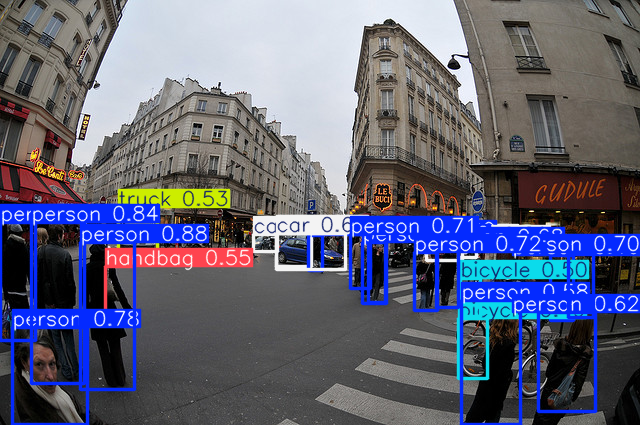


0: 480x640 11 persons, 1 horse, 1 umbrella, 1 potted plant, 485.2ms
Speed: 3.0ms preprocess, 485.2ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


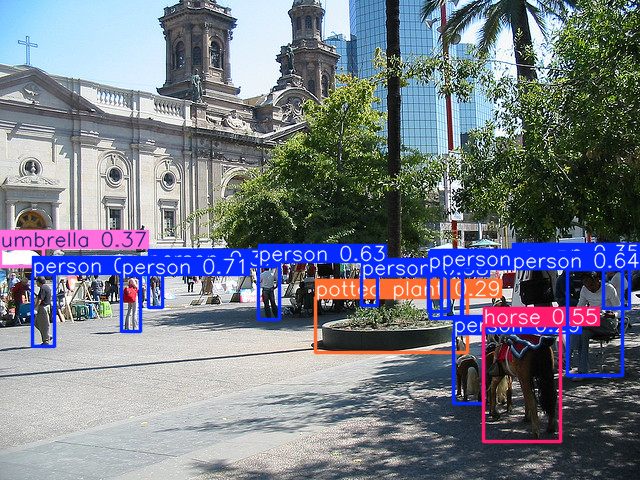


0: 448x640 12 persons, 6 bicycles, 243.2ms
Speed: 7.0ms preprocess, 243.2ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


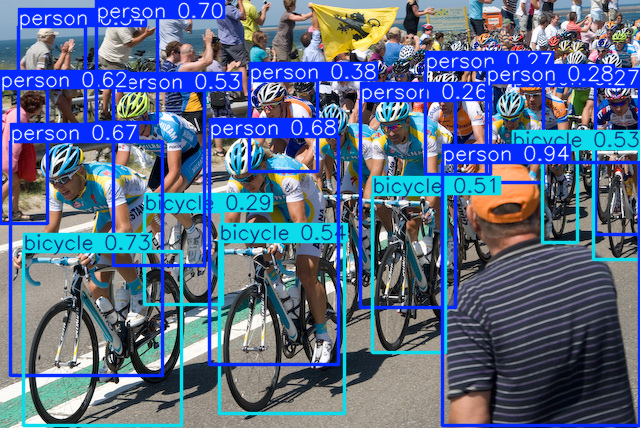


0: 480x640 2 persons, 2 bicycles, 3 cars, 2 trucks, 3 traffic lights, 269.3ms
Speed: 4.7ms preprocess, 269.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


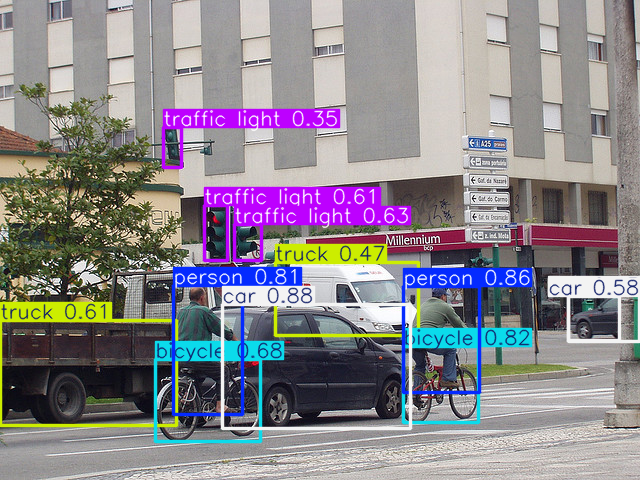


0: 448x640 11 persons, 1 bicycle, 3 cars, 1 bus, 296.1ms
Speed: 2.8ms preprocess, 296.1ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


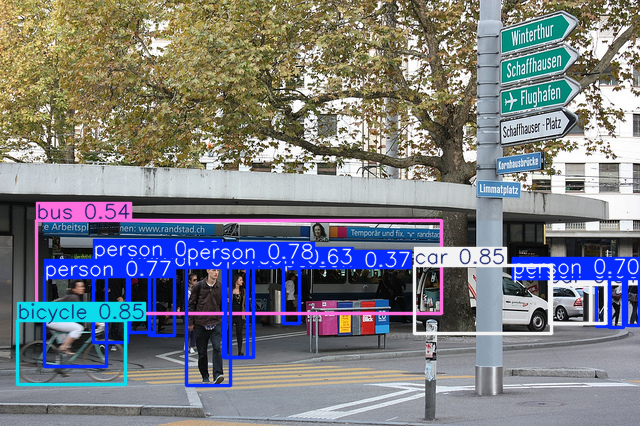

In [ ]:
import cv2
import matplotlib.pyplot as plt

for img_info in bicycle_imgs:
    img_path = img_info['file_name']
    img = Image.open(img_path)

    results = yolo(img)
    for res in results:
      res.show()


image 1/1 /content/000000184324.jpg: 448x640 14 persons, 2 bicycles, 5 cars, 1 truck, 1 handbag, 264.4ms
Speed: 2.8ms preprocess, 264.4ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


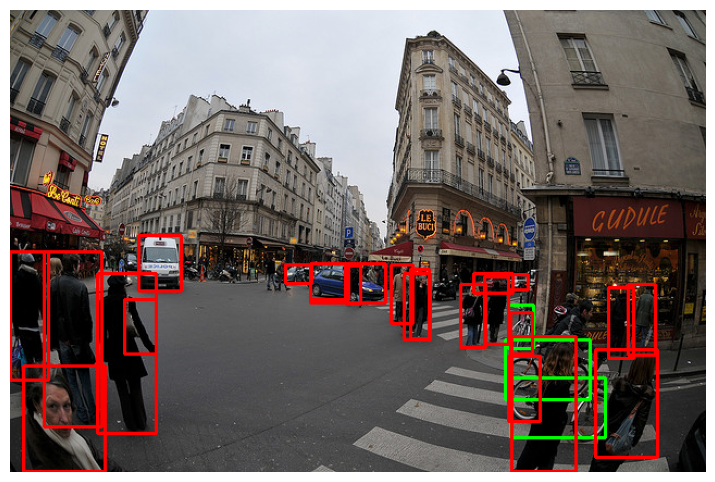


image 1/1 /content/000000546823.jpg: 480x640 11 persons, 1 horse, 1 umbrella, 1 potted plant, 279.5ms
Speed: 3.4ms preprocess, 279.5ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)


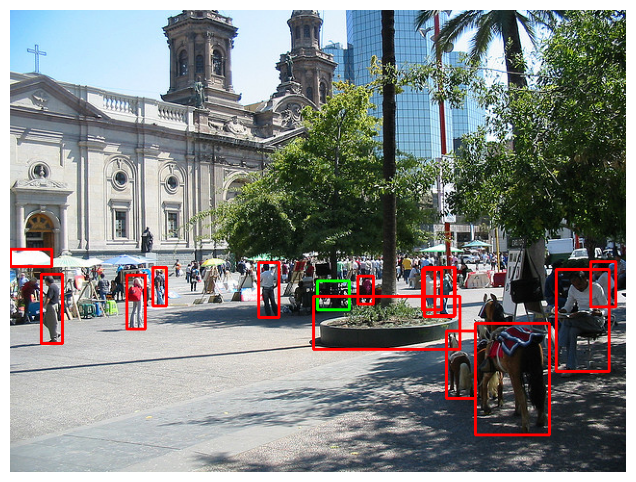


image 1/1 /content/000000343561.jpg: 448x640 12 persons, 6 bicycles, 229.6ms
Speed: 4.0ms preprocess, 229.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


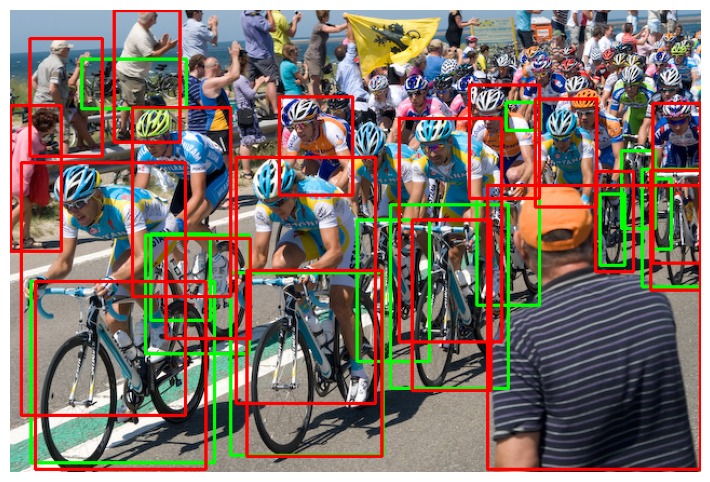


image 1/1 /content/000000169996.jpg: 480x640 2 persons, 2 bicycles, 3 cars, 2 trucks, 3 traffic lights, 269.7ms
Speed: 4.3ms preprocess, 269.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


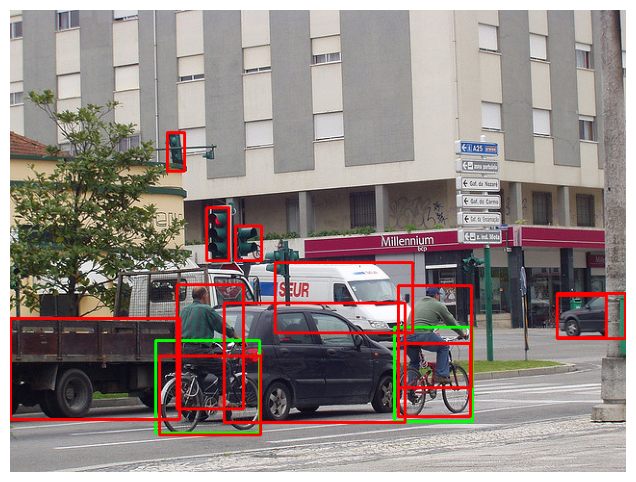


image 1/1 /content/000000277005.jpg: 448x640 11 persons, 1 bicycle, 3 cars, 1 bus, 241.2ms
Speed: 3.5ms preprocess, 241.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


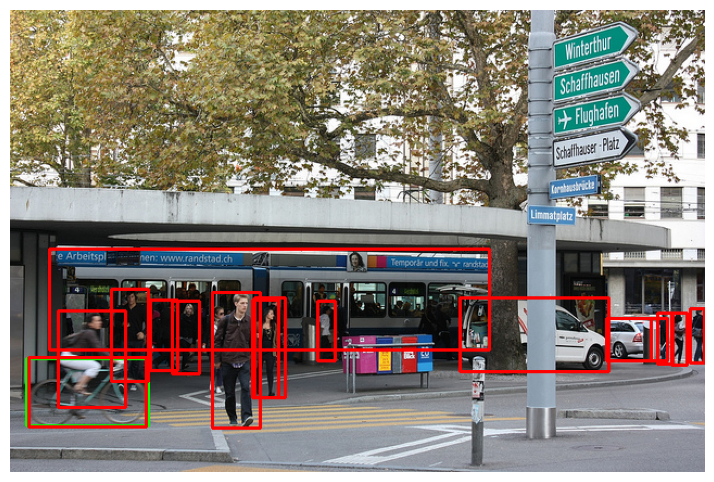

In [ ]:
import numpy as np

def draw_bboxes(img_path, results, coco, img_id):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ann_ids = coco.getAnnIds(imgIds=[img_id], catIds=[bicycle_category_id])
    anns = coco.loadAnns(ann_ids)

    for ann in anns:
        x, y, w, h = map(int, ann['bbox'])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    for r in results:
        for box in r.boxes.xyxy:
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

for img_info in bicycle_imgs:
    draw_bboxes(img_info['file_name'], yolo(img_info['file_name']), coco, img_info['id'])